In [3]:
from mpl_toolkits.mplot3d import Axes3D

?Axes3D

Text(0.5,0,'Enegy')

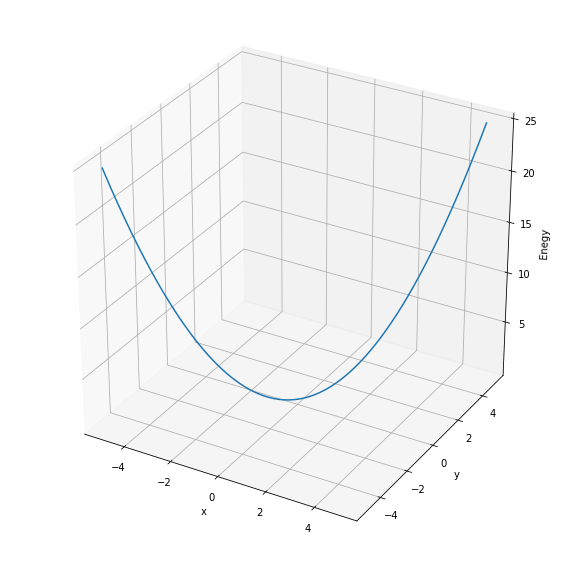

In [3]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D

# x(t)=Acos(wt+pi)
#mass=1(kg), k=5 >> w=(k/m)**0.5
#Amplitude=2
#pi=0


t=np.arange(0,10.01,0.01)

err=np.random.uniform(-1,1, size=(len(t),))/5

x = np.arange(-5,5,0.01)
y = np.arange(-5,5,0.01)

def func(x,y):
    f = 0.5*x**2 + 0.5*y**2
    return f

# ff = np.cos(4*t)+x
table = {'x' : x, 'y' : y, 'f' : func(x,y)}
# table_r = {'t' : t, 'x' : x, 'f' : f}

data = DataFrame(table)
data.to_csv("//home//ban94gy//jupyter//ML//exer//END//2d//2d.csv")

# data_r = DataFrame(table_r)
# data_r.to_csv("//home//ban94gy//jupyter//ML//exer//END//2d//os_r.csv")


fig = plt.figure(figsize=(10,10))  
ax = fig.add_subplot(111, projection='3d')  
ax.plot(x,y,func(x,y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Enegy')

# plt.plot(t,x,y)
# plt.xlabel('time')  # x-axis
# plt.ylabel('f(x,y)')  # y-axis
# plt.grid()  # grid
# plt.show()  # plot show
    


In [31]:
f

[(-5.0, -5.0, 25.0),
 (-5.0, -4.9900000000000002, 24.950050000000001),
 (-5.0, -4.9800000000000004, 24.900200000000002),
 (-5.0, -4.9700000000000006, 24.850450000000002),
 (-5.0, -4.9600000000000009, 24.800800000000002),
 (-5.0, -4.9500000000000011, 24.751250000000006),
 (-5.0, -4.9400000000000013, 24.701800000000006),
 (-5.0, -4.9300000000000015, 24.652450000000009),
 (-5.0, -4.9200000000000017, 24.603200000000008),
 (-5.0, -4.9100000000000019, 24.554050000000011),
 (-5.0, -4.9000000000000021, 24.50500000000001),
 (-5.0, -4.8900000000000023, 24.456050000000012),
 (-5.0, -4.8800000000000026, 24.40720000000001),
 (-5.0, -4.8700000000000028, 24.358450000000012),
 (-5.0, -4.860000000000003, 24.309800000000017),
 (-5.0, -4.8500000000000032, 24.261250000000015),
 (-5.0, -4.8400000000000034, 24.212800000000016),
 (-5.0, -4.8300000000000036, 24.164450000000016),
 (-5.0, -4.8200000000000038, 24.116200000000021),
 (-5.0, -4.8100000000000041, 24.068050000000021),
 (-5.0, -4.8000000000000043, 24.

In [34]:
# def plot_pred(hof):
#     func = toolbox.compile(expr=hof[0])
#     y_hat = []
    
#     for i,j in enumerate(x,y):
#         y_hat.append(func(i,j))
        
#     fig = plt.figure(figsize=(10,10))  
#     ax = fig.add_subplot(111, projection='3d')  
#     ax.plot(x,y,func(x,y))
#     ax.plot(x,y,func_hat(x,y))
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('Enegy')
    
#     plt.plot(t,y)
#     plt.plot(t, y_hat)
#     plt.plot(t, y_r)
#     plt.xlabel('time')  # x-axis
#     plt.ylabel('x(t)')  # y-axis
#     plt.title('Data')  # title
#     plt.grid()  # grid
#     plt.legend(['with error','predicted','real'])
#     plt.show()  # plot show
###############################import###############################
import operator
import math
import random
import pandas as pd
import numpy
import time
import os
import dill
from sympy import *
from sympy.parsing import sympy_parser

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
from scoop import futures
from pandas import DataFrame

from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import multiprocessing as mp

###################################################################

###################### Define functions############################
def safeDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1
    
def sqrt(left):
    if left>=0:
        return left**0.5
    else:
        return 0
    
def expe(left):
    if left>=0:
        return numpy.exp(-left)
    else:
        return 0




pset = gp.PrimitiveSet("MAIN", 2)
pset.addPrimitive(operator.add, 2)
#pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(expe, 1)
#set.addPrimitive(safeDiv, 2)
pset.addPrimitive(sqrt,1)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
try:
    pset.addEphemeralConstant("rand", random.randint(1,25)/5)
except:
    print("")
#pset.addEphemeralConstant("rand", lambda: random.randint(1,5))
#pset.addEphemeralConstant("rand"+str(ran1)+str(ran2), lambda: random.randint(min(ran1,ran2),max(ran1,ran2)))
pset.renameArguments(ARG0='x')
pset.renameArguments(ARG1='y')



###################################################################
pool = mp.Pool()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
#toolbox.register("map", futures.map)

#########################input DATA#################################

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error between the expression
    sqerrors = ((func(x,y) - r)**2 for x,y,r in points)

    try:
        return max(sqerrors),
    except IndexError:
        return max(sqerrors),
    
toolbox.register("map", pool.map)


g = pd.read_csv('2d.csv')
p = g['x']
q = g['y']
r = g['f']

pts=[]

for i in range(len(r)):
    pts.append((p[i],q[i],r[i]))
    
    
toolbox.register("evaluate", evalSymbReg, points=pts)
toolbox.register("select", tools.selTournament, tournsize=100)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=1, max_=3)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=4))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=4))


def main():
    pop = toolbox.population(n=5000)
    hof = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)
    
    
    #############################################C.O, Muta,Gener##########
    try:
        pop, log = algorithms.eaSimple(pop, toolbox, 0.8, 0.8, 100, stats=mstats,
                                       halloffame=hof, verbose=True)
        print (hof[0])
#         plot_pred(hof)
        return hof
    
    except MemoryError:
        print (hof[0])
#         plot_pred(hof)
        return hof
    
    except KeyboardInterrupt:
        print (hof[0])
#         plot_pred(hof)
        return hof



if __name__ == "__main__":    
    hof = main()
    

/home/ban94gy/ban/local/lib/python3.5/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/ban94gy/ban/local/lib/python3.5/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
Process ForkPoolWorker-518:
KeyboardInterrupt
Process ForkPoolWorker-514:
Process ForkPoolWorker-497:
Process ForkPoolWorker-502:


IndexError: list index out of range

Process ForkPoolWorker-521:
Process ForkPoolWorker-515:
Process ForkPoolWorker-517:
Process ForkPoolWorker-507:
Process ForkPoolWorker-523:
Process ForkPoolWorker-522:
Process ForkPoolWorker-500:
Process ForkPoolWorker-501:
Process ForkPoolWorker-520:
Process ForkPoolWorker-513:
Process ForkPoolWorker-512:
Process ForkPoolWorker-516:
Process ForkPoolWorker-499:
Process ForkPoolWorker-509:
Process ForkPoolWorker-485:
Process ForkPoolWorker-511:
Process ForkPoolWorker-484:
Process ForkPoolWorker-498:
Process ForkPoolWorker-510:
Process ForkPoolWorker-496:
Process ForkPoolWorker-506:
Process ForkPoolWorker-508:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-495:
Traceback (most recent call last):
Process ForkPoolWorker-494:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (mo

  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
KeyboardInterrupt
  File "<ipython-input-33-5c8256642745>", line 117, in evalSymbReg
    return max(sqerrors),
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-33-5c8256642745>", line 117, in evalSymbReg
    return max(sqerrors),
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-33-5c8256642745>", line 114, in <genexpr>
    sqerrors = ((func(x,y) - r)*

  File "<ipython-input-33-5c8256642745>", line 117, in evalSymbReg
    return max(sqerrors),
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-33-5c8256642745>", line 114, in <genexpr>
    sqerrors = ((func(x,y) - r)**2 for x,y,r in points)
KeyboardInterrupt
  File "<ipython-input-33-5c8256642745>", line 114, in <genexpr>
    sqerrors = ((func(x,y) - r)**2 for x,y,r in points)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "<ipython-input-33-5c8256642745>", line 114, in <genexpr>
    sqerrors = ((func(x,y) - r)**2 for x,y,r in points)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, i

  File "<ipython-input-33-5c8256642745>", line 117, in evalSymbReg
    return max(sqerrors),
  File "<ipython-input-33-5c8256642745>", line 114, in <genexpr>
    sqerrors = ((func(x,y) - r)**2 for x,y,r in points)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "<ipython-input-33-5c8256642745>", line 117, in evalSymbReg
    return max(sqerrors),
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "<ipython-input-33-5c8256642745>", line 114, in <genexpr>
    sqerrors = ((func(x,y) - r)**2 for x,y,r in points)
  File "<ipython-input-33-5c8256642745>", line 117, in evalSymbReg
    return max(sqerrors),
KeyboardInterrupt
  File "<ipython-input-33-5c8256642745>", line 117, in evalSymbReg
    return max(sqerrors),
  File "<ipython-input-33-5c8256642745>", line 114, in <genexpr>
    sq

In [21]:
from sympy import *
from sympy.parsing import sympy_parser


x = Symbol('x')
y = Symbol('y')

def add(a,b):
    return a+b

def expe(a):
    return exp(-a)

def mul(a,b):
    return a*b

def neg(a):
    return -a

def sqrt(a):
    return a**0.5

expr_dict = {'add':add, 'expe':expe, 'mul':mul,'neg':neg,'sqrt':sqrt}

d = sympy_parser.parse_expr(str(hof[0]), local_dict=expr_dict)
d

(2*x + 2*y**0.5 + 3*sin(y))*(4*x**2 + y**2 + (-y)**0.5 + (x**2)**0.5 + sin(y))**0.5

In [13]:
def plot_pred(hof):
    func = toolbox.compile(expr=hof[0])
    y_hat = []
    
    for i,j in enumerate(x,y):
        y_hat.append(func(i,j))
        
    fig = plt.figure(figsize=(10,10))  
    ax = fig.add_subplot(111, projection='3d')  
    ax.plot(x,y,func(x,y))
    ax.plot(x,y,func_hat(x,y))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Enegy')

In [14]:
plot_pred(hof)

NameError: name 'hof' is not defined

In [4]:
max(sqerrors)

NameError: name 'sqerrors' is not defined